In [58]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
from scipy.optimize import curve_fit
%matplotlib inline

In [11]:
#Задание 1
x = sym.symbols('x')
sym.diff(sym.tan(sym.sin(x) + sym.cos(2*x+3))**2, x).evalf(subs={'x': 0})

-7.26492561828880

(-200.0, 200.0)

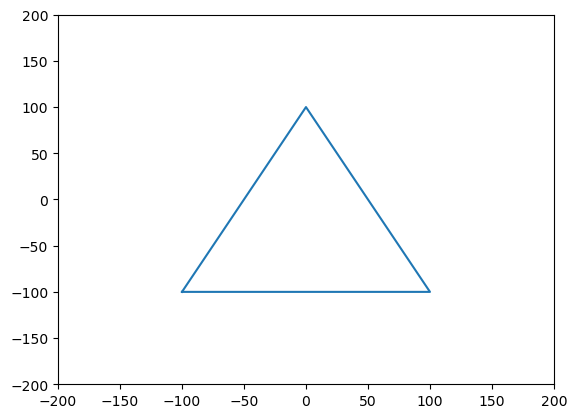

In [50]:
#Задание 2
A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

(-200.0, 200.0)

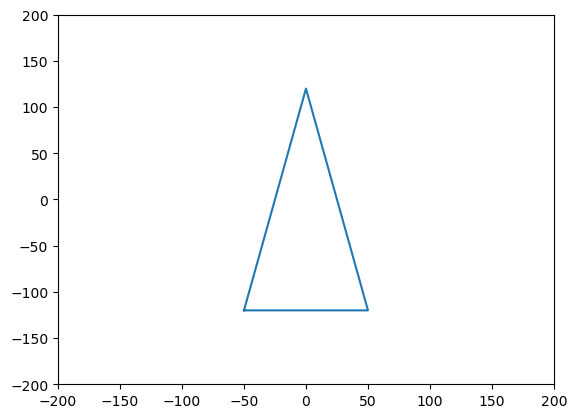

In [15]:
B = np.array(A) @ np.array([[0.5,0,0], [0,1.2,0], [0,0,1]])
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

(0.0, 400.0)

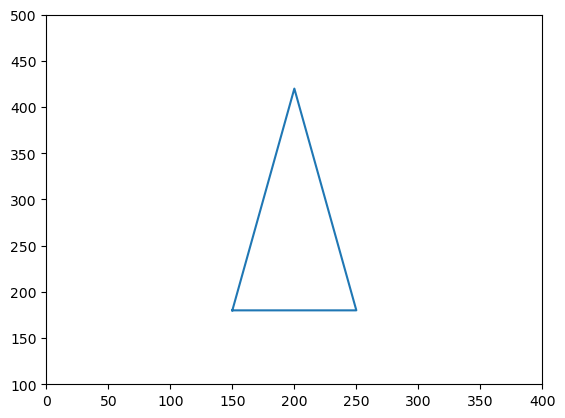

In [52]:
C = np.array(B) + np.array([[200,300,0], [200,300,0], [200,300,0], [200,300,0]])
x = C[:,0]
y = C[:,1]
plt.plot(x, y)
plt.ylim([100, 500])
plt.xlim([0, 400]) 

In [19]:
#Задание 3
m = np.array([[1, 4], [1, 1]])
print(f'Собственные значения - {np.linalg.eig(m)[0]}, собственные вектора - {np.linalg.eig(m)[1][0]} и {np.linalg.eig(m)[1][1]}')

Собственные значения - [ 3. -1.], собственные вектора - [ 0.89442719 -0.89442719] и [0.4472136 0.4472136]


In [53]:
#Задание 4
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [60]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

y = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

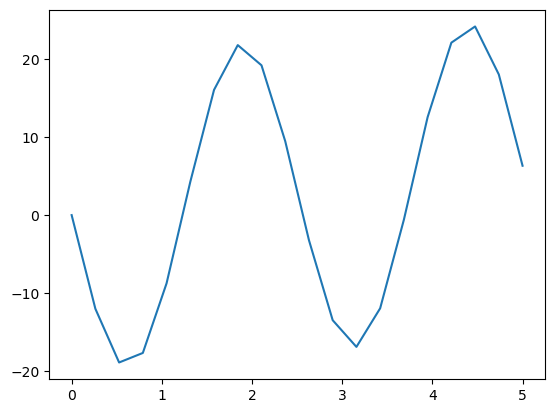

In [61]:
plt.plot(x, y)
plt.show()

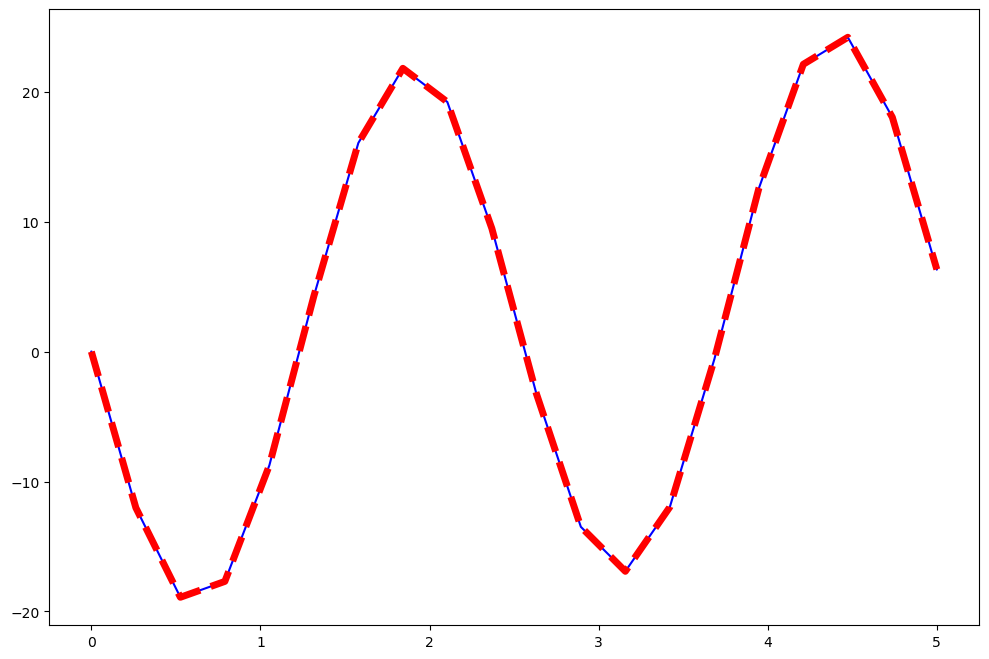

In [83]:
a_range = np.arange(-3, 3, 0.1)
b_range = np.arange(-3, 3, 0.1)

best_params = None
best_rmse = float('inf')

for a in a_range:
    for b in b_range:
        params, _ = curve_fit(f, x, y, [a, b])
        y_pred = f(x, *params)
        rmse = np.sqrt(np.mean((y - y_pred) ** 2))
        if rmse < best_rmse:
            best_params = params
            best_rmse = rmse

plt.figure(figsize = (12, 8))
plt.plot(x, y, color='blue')
plt.plot(x, f(x, best_params[0], best_params[1]), color = 'red', linestyle = '--', linewidth = 5)
plt.show()

In [85]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))
error(best_params)

1.5365240688680615e-06

In [86]:
#Задание 5
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [137]:
list_x = [i for i in range(10)]
list_y = []

for i in range(len(raitings)):
    max_= -1
    a = -1
    for j in range(len(raitings)):
        if i!=j and np.dot(raitings[i], raitings[j])/(np.linalg.norm(raitings[i])*np.linalg.norm(raitings[j])) > max_:
            max_ = np.dot(raitings[i], raitings[j])/(np.linalg.norm(raitings[i])*np.linalg.norm(raitings[j]))
            a = j
    list_y.append(a)
print([i for i in zip(list_x, list_y)])

[(0, 8), (1, 4), (2, 9), (3, 9), (4, 8), (5, 9), (6, 3), (7, 5), (8, 0), (9, 2)]
